In [2]:
import pandas as pd
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port=5432,
    database="saas_analytics",
    user="postgres",
    password="ammindu"  # replace with your PostgreSQL password
)

print("Connection successful!")

Connection successful!


In [3]:
mrr = pd.read_sql("SELECT * FROM mv_mrr", conn)
mrr.head()

C:\Users\kamal\AppData\Local\Temp\ipykernel_9608\693427368.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mrr = pd.read_sql("SELECT * FROM mv_mrr", conn)


,month,mrr
0,2025-02-01 00:00:00-05:00,269.96
1,2025-03-01 00:00:00-05:00,2389.57
2,2025-04-01 00:00:00-04:00,4059.21
3,2025-05-01 00:00:00-04:00,6298.83
4,2025-06-01 00:00:00-04:00,7858.56


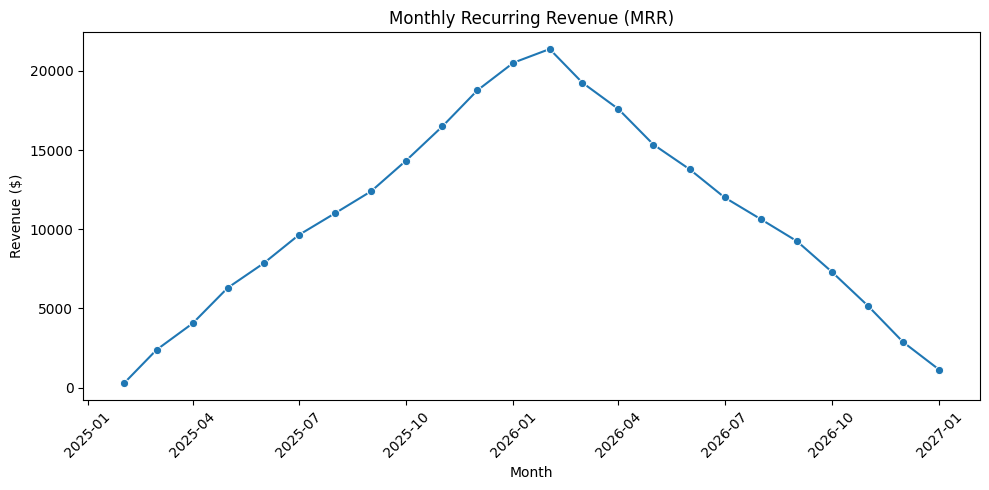

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=mrr, x='month', y='mrr', marker='o')
plt.title("Monthly Recurring Revenue (MRR)")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
churn = pd.read_sql("SELECT * FROM mv_churn_rate", conn)
churn.head()

C:\Users\kamal\AppData\Local\Temp\ipykernel_9608\1019540946.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  churn = pd.read_sql("SELECT * FROM mv_churn_rate", conn)


,month,cancelled,total,churn_rate_percent
0,2025-02-01 00:00:00-05:00,2,6,33.33
1,2025-03-01 00:00:00-05:00,7,46,15.22
2,2025-04-01 00:00:00-04:00,13,49,26.53
3,2025-05-01 00:00:00-04:00,4,42,9.52
4,2025-06-01 00:00:00-04:00,7,34,20.59


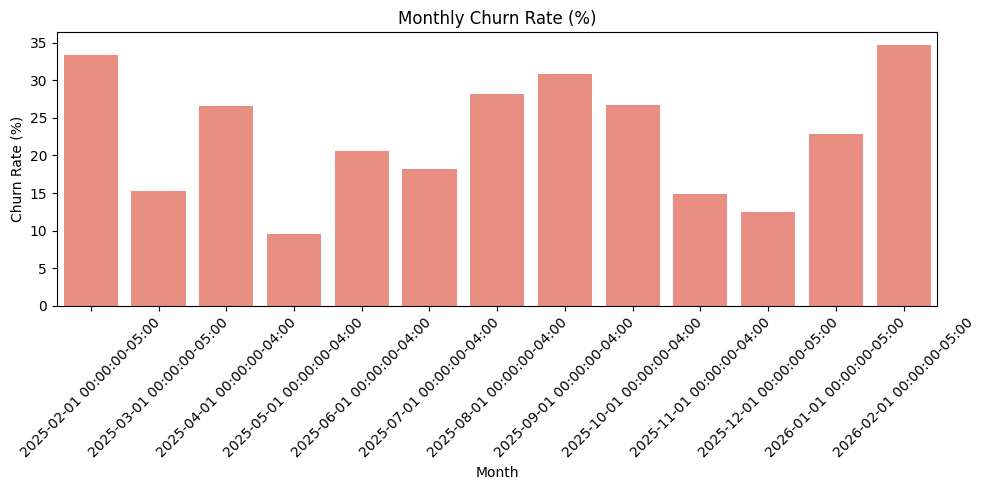

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(data=churn, x='month', y='churn_rate_percent', color='salmon')
plt.title("Monthly Churn Rate (%)")
plt.xlabel("Month")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
top_ltv = pd.read_sql("SELECT * FROM mv_top_ltv_users", conn)
top_ltv.head()

C:\Users\kamal\AppData\Local\Temp\ipykernel_9608\1051052002.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_ltv = pd.read_sql("SELECT * FROM mv_top_ltv_users", conn)


,user_id,email,lifetime_value
0,f44ec497-44fd-4c99-bfef-893f903795e9,user247@email.com,1199.88
1,a7a4ab61-3f83-4ef2-8b65-3cb9751e8e6b,user301@email.com,1199.88
2,96043258-ca71-4c96-8ac5-4964e36ad1ee,user112@email.com,1199.88
3,edba4170-8a49-49a7-a06f-8fe51f858e4c,user211@email.com,1199.88
4,05e3fda5-d58a-4a70-8fa4-27929c15b0f1,user380@email.com,1199.88


C:\Users\kamal\AppData\Local\Temp\ipykernel_9608\1721231884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ltv, x='lifetime_value', y='email', palette='viridis')


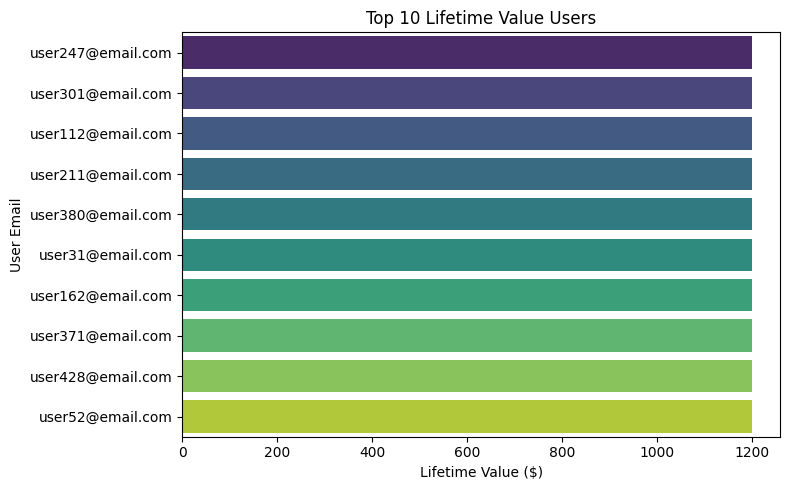

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_ltv, x='lifetime_value', y='email', palette='viridis')
plt.title("Top 10 Lifetime Value Users")
plt.xlabel("Lifetime Value ($)")
plt.ylabel("User Email")
plt.tight_layout()
plt.show()

In [13]:
import os

# Ensure the folder exists
os.makedirs("dashboard", exist_ok=True)

plt.figure(figsize=(10,5))
sns.lineplot(data=mrr, x='month', y='mrr', marker='o')
plt.title("Monthly Recurring Revenue (MRR)")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("dashboard/mrr_chart.png")  # Saves chart as PNG
plt.close()

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=churn, x='month', y='churn_rate_percent', color='salmon')
plt.title("Monthly Churn Rate (%)")
plt.xlabel("Month")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("dashboard/churn_chart.png")  # Save chart
plt.close()  # Close figure to avoid overlap


In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_ltv, x='lifetime_value', y='email', palette='viridis')
plt.title("Top 10 Lifetime Value Users")
plt.xlabel("Lifetime Value ($)")
plt.ylabel("User Email")
plt.tight_layout()
plt.savefig("dashboard/top_ltv_chart.png")  # Save chart
plt.close()

C:\Users\kamal\AppData\Local\Temp\ipykernel_9608\242386956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ltv, x='lifetime_value', y='email', palette='viridis')
